#  DSC530-T304 Data Exploration and Analysis - Week 7 #

## Relationships between variables and Estimations ##

### Excercise Chapter 7 ###
-----

In [1]:
# Download pregency and respondent data files from thinkstat

from os.path import basename, exists

# Declare a function to download the files to local
def download(fileurl):
    filename = basename(fileurl)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(fileurl, filename)
        print("Downloaded " + local)

In [2]:
# Dowload the python and data files to load pregnency and respondent data 
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

**Excercise 7-1**   Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [3]:
# download the python file read the bio metric data
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")

In [4]:
# download the  bio metric data file
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

In [5]:
# import the script to laod data
import nsfg


In [6]:
# Load Pregency data in a Dataframe
preg_df = nsfg.ReadFemPreg()
preg_df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [7]:
# Filter only live birth records
live_birth = preg_df[preg_df.outcome == 1]

In [8]:
len(live_birth)

9148

In [9]:
# Drop the records that hasa NA or null value in age at pregnancy and total weight of live babies
live_age_wt_df = live_birth.dropna(subset=['agepreg', 'totalwgt_lb'])

In [10]:
# reduce the dimesnsion of the dataframe to include only age at pregnancy and total weight of live babies features or columns
live_age_wt_df = live_age_wt_df[['agepreg', 'totalwgt_lb']]

In [11]:
# sort the dataframe by age to group that data 
live_age_wt_df = live_age_wt_df.sort_values(by='agepreg')

In [12]:
live_age_wt_df.describe()

,agepreg,totalwgt_lb
count,9038.000000,9038.000000
mean,24.936129,7.265628
std,5.553985,1.408293
min,10.830000,0.125000
25%,20.500000,6.500000
50%,24.330000,7.375000
75%,28.890000,8.125000
max,44.080000,15.437500


In [14]:
import pandas as pd
# Add group id to the data to bins using the age range ,  break them into 20 groups 
live_age_wt_df['Percentile'] = pd.qcut(live_age_wt_df['agepreg'], q=20, labels=False)


In [15]:
live_age_wt_df.head()

,agepreg,totalwgt_lb,Percentile
389,10.83,6.4375,0
11508,10.91,8.5000,0
4615,11.75,7.3750,0
4091,12.66,6.6250,0
11773,13.50,6.8125,0


In [16]:
# Group the data using the group column  value
grouped_data = live_age_wt_df.groupby('Percentile')

In [17]:
len(grouped_data)

20

In [18]:
import thinkstats2
import thinkplot
# find the mean value of the age  for each group
ages = [group.agepreg.mean() for i, group in grouped_data]
# find the cdf value for each record in the group
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in grouped_data]

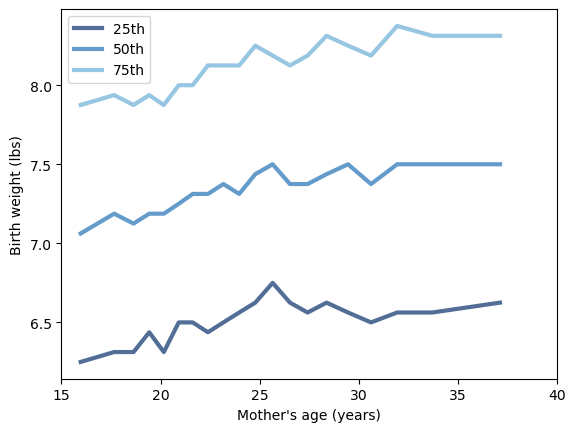

In [19]:
thinkplot.PrePlot(3)

# Find the 25th percentile for each group among the cdf values  and plot them
tot_weight1 = [cdf.Percentile(25) for cdf in cdfs]
thinkplot.Plot(ages, tot_weight1, label='25th')

# Find the 50th percentile for each group among the cdf values and plot them
tot_weight1 = [cdf.Percentile(50) for cdf in cdfs]
thinkplot.Plot(ages, tot_weight1, label='50th')

# Find the 75th percentile for each group among the cdf values and plot them
tot_weight1 = [cdf.Percentile(75) for cdf in cdfs]
thinkplot.Plot(ages, tot_weight1, label='75th')

thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[15, 40], legend=True)

In [20]:
# Pearson correlation between age and weight
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(live_age_wt_df['agepreg'], live_age_wt_df['totalwgt_lb'])
print('Correlation : ', pearson_corr)

Correlation :  0.06883397035410908


In [21]:
# Spearman correlation between age and weight
from scipy.stats import spearmanr
spearman_corr, p_value = spearmanr(live_age_wt_df['agepreg'], live_age_wt_df['totalwgt_lb'])
print("Spearman's Correlation : ", spearman_corr )

Spearman's Correlation :  0.09461004109658226


### Excercise Chapter 8 ###
-----

**Excercise 8-1**
In this chapter we used x-bar and median to estimate µ, and found that x-bar yields lower MSE. Also, we used S2 and Sn−12 to estimate σ, and found that S2 is biased and Sn−12 unbiased.
Run similar experiments to see if x and median are biased estimates of µ. Also check whether S2 or Sn−12 yields a lower MSE.

In [22]:
import numpy as np
import random
from sklearn.metrics import mean_squared_error

random.seed(500)

# A custom RMSE calculation method that compares the predicted values against a 
# normal distribution that has actual value of an array of 0s 
# here used for (mean/ meadin etc)
def calculateRMSE(predicted_values, act_val):
    # create a list of actual values for each iteration which is ideal one 
    actual_values = np.full(len(predicted_values), act_val)
    return mean_squared_error(actual_values, predicted_values, squared=False)



# A custom MeanError calculation method that compares the predicted values against a 
# normal distribution that has actual value of an array of 0s 
# here used for (mean/ meadin etc)
def calculateMeanError(predicted_values, act_val):
    # create a list of actual values for each iteration which is ideal one 
    actual_values = np.full(len(predicted_values), act_val)
    return np.mean(actual_values - predicted_values)





**Run  experiments to see if  x¯  and median are biased estimates of µ.**

In [23]:
# create a function to run muliple iterations to find Mean error
def runMeanErrorIterationsEstimatesForGivenSample(num_of_sample_values, iterations,  pop_mean, pop_std):
    # create two list to hold the mean value and median value for each iteration
    means_lst = []
    medians_lst = []
    # perform iterations as per the value provided
    for j in range(iterations):
        # create a  normal distribution random values for the given range
        random_values = [random.gauss(pop_mean, pop_std) for i in range(num_of_sample_values)]
        # find the mean value of the sample
        sampl_xbar = np.mean(random_values)
        # find the median value of the sample
        sampl_median = np.median(random_values)
        # Add the mean value to the mean list
        means_lst.append(sampl_xbar)
        # Add the median value to the median list
        medians_lst.append(sampl_median)

    # find the MeanError of the predicted mean/median vs actual ideal normal distribution mean/median values
    print('*** Mean Error For Given Iterations : ', iterations, ' ***')
    print('Mean error xbar',   calculateMeanError(means_lst, pop_mean))
    print('Mean error median', calculateMeanError(medians_lst, pop_mean))



    
# create a function to run muliple iterations to find RMSE error    
def runRMSEIterationsEstimatesForGivenSample(num_of_sample_values, iterations,  pop_mean, pop_std):
    # create two list to hold the biased variance value and unbiased variance value for each iteration
    biased_var_lst = []
    unbiased_var_lst = []
    # perform iterations as per the value provided
    for j in range(iterations):
        # create a  normal distribution random values for the given range
        random_values     = [random.gauss(pop_mean, pop_std) for i in range(num_of_sample_values)]
        # calculate the variance for the given sample values
        sampl_var         = np.var(random_values)
        # When ddof  (Delta Degrees of Freedom) is set to 1, it computes the sample variance, 
        # which is an unbiased estimator of the population variance.
        sampl_unbiased_var = np.var(random_values, ddof=1)
        # Add the sample variance value to the biased list
        biased_var_lst.append(sampl_var)
        # Add the unbiased variance value to the unbiased list
        unbiased_var_lst.append(sampl_unbiased_var)
        
        #  Derive the variance from standard deviation
        ideal_var = pop_std**2

    # Find the Root mean square error between biased and unbiased variances
    print('*** RMSE For Given Iterations : ', iterations, ' ***')
    print('RMSE for biased variance ',   calculateRMSE(biased_var_lst,  ideal_var))
    print('RMSE for unbiased variance ', calculateRMSE(unbiased_var_lst, ideal_var))

    


In [24]:
# Calculate Mean error and RMSE for 
# Random value = 10
# Iterations = 1000
# population mean = 0 (ideal Gaussian normal distribution)
# population standard deviation = 1  (ideal Gaussian normal distribution)
runMeanErrorIterationsEstimatesForGivenSample(10,1000, 0, 1)
runRMSEIterationsEstimatesForGivenSample(10,1000, 0, 1)

*** Mean Error For Given Iterations :  1000  ***
Mean error xbar 0.011491445808427155
Mean error median 0.008120299208967232
*** RMSE For Given Iterations :  1000  ***
RMSE for biased variance  0.4357547754693213
RMSE for unbiased variance  0.470826782474093


In [25]:
# Calculate Mean error and RMSE for 
# Random value = 10
# Iterations = 10000
# population mean = 0 (ideal Gaussian normal distribution)
# population standard deviation = 1  (ideal Gaussian normal distribution)
runMeanErrorIterationsEstimatesForGivenSample(10,10000, 0, 1)
runRMSEIterationsEstimatesForGivenSample(10,10000, 0, 1)

*** Mean Error For Given Iterations :  10000  ***
Mean error xbar 0.0004955820181550536
Mean error median 0.0012481148013734488
*** RMSE For Given Iterations :  10000  ***
RMSE for biased variance  0.4391128304417425
RMSE for unbiased variance  0.4739771075196679


In [26]:
# Calculate Mean error and RMSE for 
# Random value = 10
# Iterations = 100000
# population mean = 0 (ideal Gaussian normal distribution)
# population standard deviation = 1  (ideal Gaussian normal distribution)
runMeanErrorIterationsEstimatesForGivenSample(10,100000, 0, 1)
runRMSEIterationsEstimatesForGivenSample(10,100000, 0, 1)

*** Mean Error For Given Iterations :  100000  ***
Mean error xbar 0.0008079729656354251
Mean error median -0.0002676186091319888
*** RMSE For Given Iterations :  100000  ***
RMSE for biased variance  0.43640260238612344
RMSE for unbiased variance  0.4724552752031351


**Findings for Excercise 8-1**
- Mean error  decreases as number of iterations increases  which shows that more samples/ iterations reduces Mean error
- Variance holds up its position and not impacted by higher number of samples or iterations.   The diffference between biased and unbiased is maintained.
----

**Exercise 2**  
Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.
Repeat the experiment with a few different values of n and make a plot of standard error versus n.

In [41]:
import math

def caluculateAndPlotExponentialDistribution(lamda, size_of_sample, iterations, plot_cdf=False):
    # create a list to hold lamda values 
    lamda_val_lst  = []
    stderr_lst     = []
    # perform iterations as per the value provided
    for j in range(iterations):
        # generate exponential random values for tht erequested number of variables
        rndm_exp_val  = np.random.exponential(1.0/lamda, size_of_sample)
        # calculate lambda values for the given sample
        lamda_bar = 1.0 / np.mean(rndm_exp_val)
        #Add the lambda bar to the lambda list
        lamda_val_lst.append(lamda_bar)
        # Stadard error is calculated by dividing standard deviation of samply by square root of size of sample 
        # and add to the list
        stderr_lst.append(np.std(rndm_exp_val) / math.sqrt(size_of_sample))

    # use RMSE to find the standard error of the estimate 
    stderr = calculateRMSE(lamda_val_lst, lamda)
    # Print tradtional standrad error 
    # Standard error mean using standard deviation
    sd_stnd_error = sum(stderr_lst) / len(stderr_lst)
    

    cdf = thinkstats2.Cdf(lamda_val_lst)
    ci_5  = cdf.Percentile(5)
    ci_95 = cdf.Percentile(95)
    print('*** Std Error and CI For Given Iterations : ', iterations, 'sample size: ', size_of_sample, ' ***')
    print('Standard error', stderr)
    print('confidence interval 90 percentile : ', cdf.Percentile(90))
    if(plot_cdf):
        thinkplot.Plot([ci_5, ci_5], [0, 1], color='0.8', linewidth=3)
        thinkplot.Plot([ci_95, ci_95], [0, 1], color='0.8', linewidth=3)
        # plot the CDF
        thinkplot.Cdf(cdf)
        thinkplot.Config(xlabel='estimate',
                         ylabel='CDF',
                         title='Sampling distribution')

    return stderr, sd_stnd_error

    



*** Std Error and CI For Given Iterations :  1000 sample size:  10  ***
Standard error 0.7501509951261888
confidence interval 90 percentile :  3.1398739550277086


(0.7501509951261888, 0.1407199099174386)

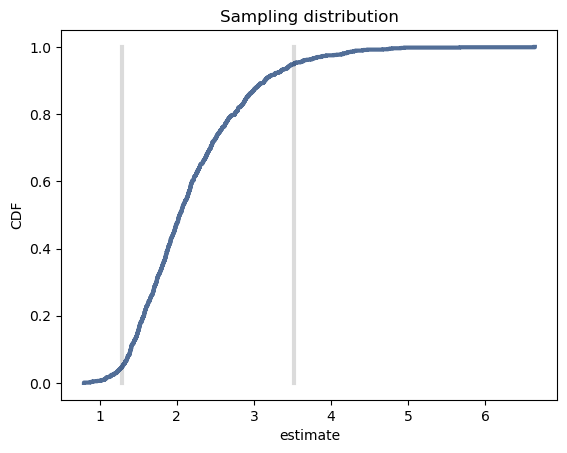

In [42]:
caluculateAndPlotExponentialDistribution(2, 10, 1000, plot_cdf=True)

In [51]:
# create a list of size of the sample to run multiple iterations
num_ofsample = [10,15,15,20,25,30,35,40,45,50]
# a list to hold 
std_err_lst     = []
sd_stnd_err_lst =  []
for i in range(len(num_ofsample)):
    std_err, sd_stnd_err = caluculateAndPlotExponentialDistribution(2, num_ofsample[i], 1000)
    std_err_lst.append( std_err ) 
    sd_stnd_err_lst.append( sd_stnd_err )


*** Std Error and CI For Given Iterations :  1000 sample size:  10  ***
Standard error 0.7281611374913193
confidence interval 90 percentile :  3.1337867530706176
*** Std Error and CI For Given Iterations :  1000 sample size:  15  ***
Standard error 0.6043818978446495
confidence interval 90 percentile :  2.882703162158088
*** Std Error and CI For Given Iterations :  1000 sample size:  15  ***
Standard error 0.6336021993010196
confidence interval 90 percentile :  2.933948939061565
*** Std Error and CI For Given Iterations :  1000 sample size:  20  ***
Standard error 0.47833439238386194
confidence interval 90 percentile :  2.681362816549604
*** Std Error and CI For Given Iterations :  1000 sample size:  25  ***
Standard error 0.44188076577358365
confidence interval 90 percentile :  2.656844940893583
*** Std Error and CI For Given Iterations :  1000 sample size:  30  ***
Standard error 0.3783366709936328
confidence interval 90 percentile :  2.5212421104587177
*** Std Error and CI For Given

In [52]:
std_err_lst

[0.7281611374913193,
 0.6043818978446495,
 0.6336021993010196,
 0.47833439238386194,
 0.44188076577358365,
 0.3783366709936328,
 0.36931157052510816,
 0.3285925588270561,
 0.3155701819219782,
 0.3058668643126214]

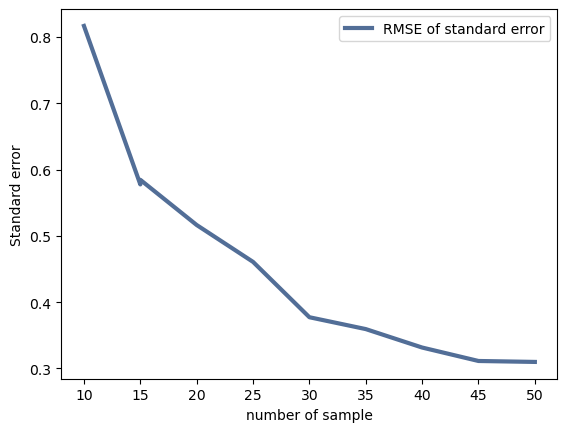

In [50]:
#thinkplot.PrePlot(2)
thinkplot.Plot(num_ofsample, std_err_lst, label='RMSE of standard error')
#thinkplot.Plot(num_ofsample, sd_stnd_err_lst, label='SD based standard error')

thinkplot.Config(xlabel="number of sample",
                     ylabel='Standard error',
                      legend=True)